## Biodiversity in National Parks Project

##### 
**Mission of the project:** Interpret data from the National Parks Service about endangered species in different parks. Perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, the data will be analyzed, cleaned up, and plotted as well as pose questions and seek to answer them in a meaningful way.

Here are a few questions that this project has sought to answer: 

1) What is the distribution of conservation status for species?  
2) Are certain types of species more likely to be endangered?  
3) Are the differences between species and their conservation status significant?  
4) Which animal is most prevalent and what is their distribution amongst parks?  

Data sources:

Both Observations.csv and Species_info.csv was provided by Codecademy.com.

Note: The data for this project is inspired by real data, but is mostly fictional.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load species_info
species = pd.read_csv('species_info.csv')
species.head(20)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


Inspect the data

In [3]:
species.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

In [4]:
species.shape

(5824, 4)

In [5]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [6]:
species['conservation_status'].value_counts(dropna=False)

NaN                   5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

In [7]:
#load observations.csv
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [8]:
print(observations.dtypes)
print(observations.shape)
print(observations.info())

scientific_name    object
park_name          object
observations        int64
dtype: object
(23296, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


### 1) Distribution of conservation status for species

In [9]:
#Find the number and type of distinct species
species_unique = species['category'].unique()
species_unique_count = species['category'].nunique()
print(species_unique)
print(species_unique_count)

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
7


In [10]:
#Find out the total count of each species in the data
species_count = species['category'].value_counts()
species_count

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

In [11]:
#Explore the conservation status, convert the NaN value to 'Not in Concern'
species['conservation_status'].fillna('No Intervention', inplace=True)
conservation_stats = species['conservation_status'].value_counts().reset_index()
conservation_stats


,index,conservation_status
0,No Intervention,5633
1,Species of Concern,161
2,Endangered,16
3,Threatened,10
4,In Recovery,4


From the result above, one can observe that most of the species are not under protection concern while 191 of them are under threatened. 

In [12]:
species_conservation = species[species['conservation_status'] != 'No Intervention'].groupby(['category', 'conservation_status']).size().reset_index()
species_conservation

,category,conservation_status,0
0,Amphibian,Endangered,1
1,Amphibian,Species of Concern,4
2,Amphibian,Threatened,2
3,Bird,Endangered,4
4,Bird,In Recovery,3
5,Bird,Species of Concern,72
6,Fish,Endangered,3
7,Fish,Species of Concern,4
8,Fish,Threatened,4
9,Mammal,Endangered,7


Text(0.5, 1.0, 'Conservation Status of Species')

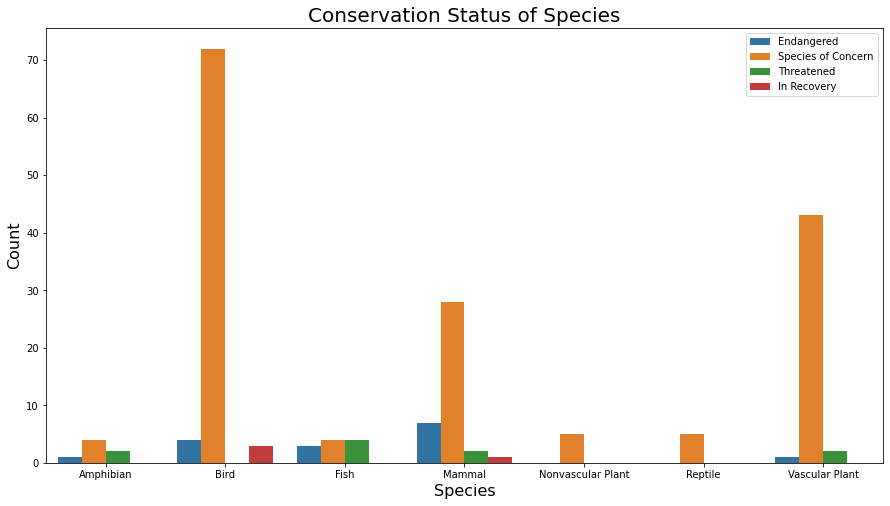

In [13]:
plt.figure(figsize=(15,8))
sns.barplot(x ='category', y =0, hue ='conservation_status',data =species_conservation)
plt.legend(loc ='upper right')
plt.xlabel('Species',fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Conservation Status of Species', fontsize=20)

From the bar chart above, Bird, Mammal abd Vascular Plant species have the highest count of needed protection conservation status. 

### Are certain types of species more likely to be endangered?

In [14]:
species['is protected']= species['conservation_status'] != 'No Intervention' 
category_count = species.groupby(['category', 'is protected']).scientific_name.nunique().reset_index()\
                .pivot(columns ='is protected',index ='category', values='scientific_name').reset_index()
category_count.columns =['Category', 'Not Protected', 'Is Protected']
category_count

,Category,Not Protected,Is Protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [15]:
category_count['Protected Percentage'] = category_count['Is Protected']/ (category_count['Is Protected']+category_count['Not Protected'])
category_count

,Category,Not Protected,Is Protected,Protected Percentage
0,Amphibian,72,7,0.088608
1,Bird,413,75,0.153689
2,Fish,115,11,0.087302
3,Mammal,146,30,0.170455
4,Nonvascular Plant,328,5,0.015015
5,Reptile,73,5,0.064103
6,Vascular Plant,4216,46,0.010793


Mammal and Bird are among the most protected species, considered they are more likely to be endangered.

### 3) Are the differences between species and their conservation status significant?

In [16]:
# use chi2-squared hypothesis test to find out the conservation status significancy between species
# we will first compare the most species with highest protected percentage ( Mammal and Bird)
from scipy.stats import chi2_contingency

mammal_bird_contingency = chi2_contingency([[30, 146], [75, 413]])
mammal_bird_contingency


(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

The p-value is 0.68, which is much higher than 0.05.  In the case of mammals and birds there doesn't seem to be any significant relationship between them.

In [17]:
# we compare the highest protected percentage species with the lowest one (Mammal vs Vascular Plant)

mammal_vasplant_contingency = chi2_contingency([[46, 4216], [30, 146]])
mammal_vasplant_contingency

(246.5870424874456,
 1.4405067309854046e-55,
 1,
 array([[7.29860297e+01, 4.18901397e+03],
        [3.01397026e+00, 1.72986030e+02]]))

The p-value is  1.4405067309854046e-55, which is much smaller than 0.05. In this case, the conservation status of mammal and vascular plant is significant different. The mammal has a statistically significant higher rate of needed protection compared to vascular plant. 

### 4) Which animal is most prevalent and what is their distribution amongst parks?

In [18]:
#to find out the most prevalent animal, we need to search the name with the highest appearance on species-comman_name column. 

import string 
from itertools import chain

#create a functionremove the punctuation from the common_name list 
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation, '')
    return text

common_name= species[species['category']=='Mammal']['common_names']\
            .apply(remove_punctuation)\
            .str.split().tolist()


common_name[:5]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

In [26]:


common_Names =[]
for lst in common_name:
    lst = list(dict.fromkeys(lst))
    for name in lst:
        common_Names.append(name)
                   
common_Names[0:5]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison']

In [20]:
common_names_series = pd.Series(common_Names).value_counts().reset_index()
common_names_df = pd.DataFrame(common_names_series)
common_names_df.columns=['Animal', 'Count']
common_names_df

,Animal,Count
0,Bat,23
1,Shrew,18
2,Myotis,17
3,Mouse,16
4,Chipmunk,13
...,...,...
199,Cattle,1
200,Wolverine,1
201,Coyote,1
202,Wildcat,1


From this analysis, 'bat' has the highest appearance in the species data. 

In [21]:
#create a column ['is_bat'] in the species data

species['is_bat'] = species.common_names.str.contains(r"\bBat\b",regex=True)
species

,category,scientific_name,common_names,conservation_status,is protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
...,...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Intervention,False,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Intervention,False,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Intervention,False,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Intervention,False,False


In [22]:
#merge the species[is_bat] dataset with observation data 
bat_observations = observations.merge(species[species['is_bat']])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


In [23]:
#Find out the observations of bats in the last 7 days in each park

park_observation = bat_observations.groupby('park_name').observations.sum().reset_index()
park_observation

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


The total number of bats observed in each park over the past 7 days are in the table above. Yellowstone National Park seems to have the largest with 8,362 observations and the Great Smoky Mountains National Park having the lowest with 2,411.

In [24]:
#Now let break down by protected and non-protected bat sightings
obs_by_park_and_protection = bat_observations.groupby(['park_name', 'is protected']).observations.sum().reset_index()
obs_by_park_and_protection

,park_name,is protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


From the table above, it shows that most of the parks have higher protected bat sightings than those non-protected one, except for Great Smoky Mountains National Park, which has more non-protected bat sightings than protected one.

Text(0.5, 1.0, 'Observations of Bats in Different Parks')

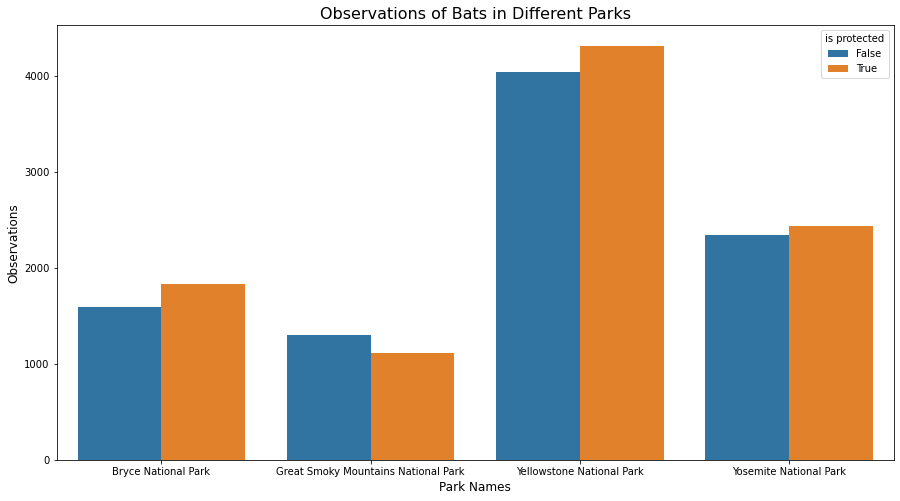

In [25]:
#plot the barchart 
plt.figure(figsize=(15,8))
sns.barplot(x ='park_name', y ='observations', hue='is protected', data = obs_by_park_and_protection )
plt.xlabel('Park Names', fontsize=12)
plt.ylabel('Observations',fontsize=12)
plt.title('Observations of Bats in Different Parks', fontsize=16)

From the barchart above, one can see that Yellowstone National Park and Bryce National Park seem to be doing a great job in protecting the bats since there are more sightings of protected bats than non-protected one. The Great Smoky Mountains National Park has the lowest bat observation sightings and the sighiting of protected bad is lower than non-protected one, this implies that that Great Mountains National Park might need to beef up on their protection effort. 

# Conclusions:

**1) What is the distribution of conservation status for species?**  
Vast majority of the species are not under threatened. (not under threatened 5633 vs under protection 191)  
**2) Are certain types of species more likely to be endangered?**  
Considered the protected percentage, Mammal and Bird species are more likely to be endangered.  
**3) Are the differences between species and their conservation status significant?**  
While Mammals and Birds do not have significant difference in conservation status; Mammals and Vascular Plants exhibit a statistically significant difference.  
**4) Which animal is most prevalent and what is their distribution amongst parks?**  
Bat is the most observed animal and they were most likely to be found in the Yellowstone National Park.  

# Further Research
The dataset only included the observations of the past 7 days, which might not be enough to establish an observation of changes over time. Therefore, it is recommended to have dataset of longer time period. Additionally, it would be useful to find out the area of the park since each park's are is different, there might be more observations and biodiversities in larger parks, while fewer in smaller parks. 